# GA & PSO Comparison

In [ ]:
# --- Import Required Libraries ---
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon, ttest_rel
sns.set_theme(style="whitegrid")

# --- Set Up Paths ---
ROOT_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
if ROOT_PATH not in sys.path:
    sys.path.insert(0, ROOT_PATH)

# --- Import Custom Libraries ---

## Algorithm Comparison


Correlation Level: NONE

Sharpe Ratio (best) - Statistical Tests
GA Mean: 1.1656, PSO Mean: 1.2805
Wilcoxon Test: Statistic=4.0000, P-Value=0.0000
Difference is statistically significant.
Paired t-Test: Statistic=-10.7837, P-Value=0.0000
Difference is statistically significant.

Annual Return (best) - Statistical Tests
GA Mean: 38221.1292, PSO Mean: 37555.2954
Wilcoxon Test: Statistic=199.0000, P-Value=0.3468
Difference is NOT statistically significant.
Paired t-Test: Statistic=1.7181, P-Value=0.0961
Difference is NOT statistically significant.

Execution Time (best) - Statistical Tests
GA Mean: 3.0185, PSO Mean: 5.3788
Wilcoxon Test: Statistic=0.0000, P-Value=0.0000
Difference is statistically significant.
Paired t-Test: Statistic=-64.8868, P-Value=0.0000
Difference is statistically significant.

Sharpe Ratio (median) - Statistical Tests
GA Mean: 0.8780, PSO Mean: 1.2805
Wilcoxon Test: Statistic=0.0000, P-Value=0.0000
Difference is statistically significant.
Paired t-Test: Statistic=

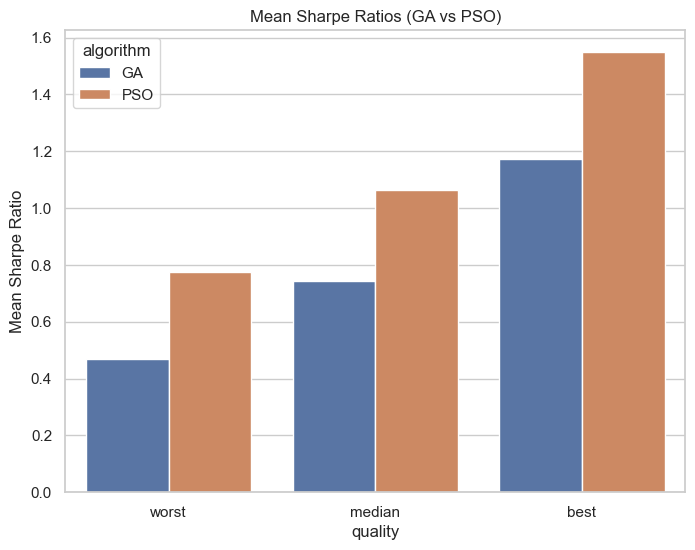

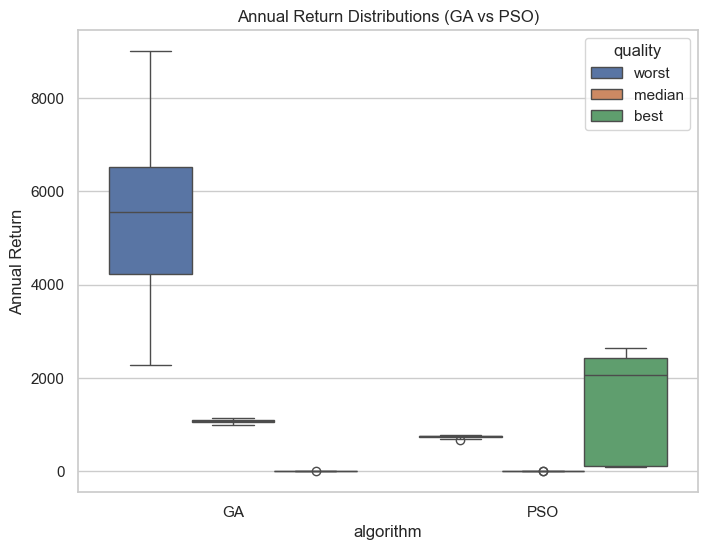

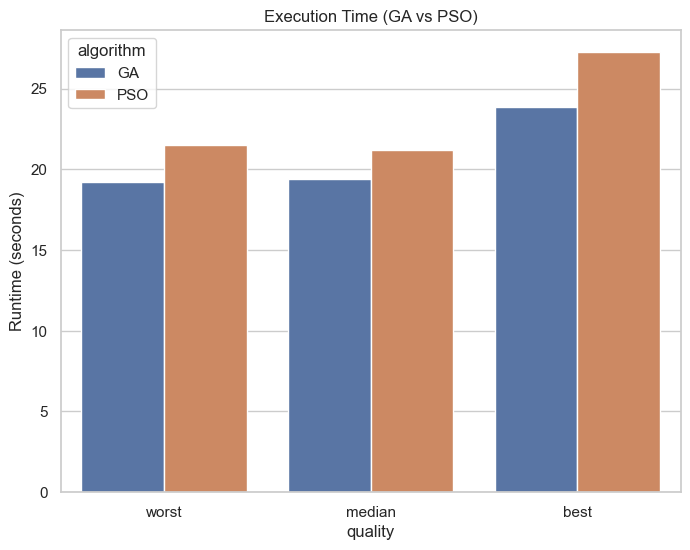

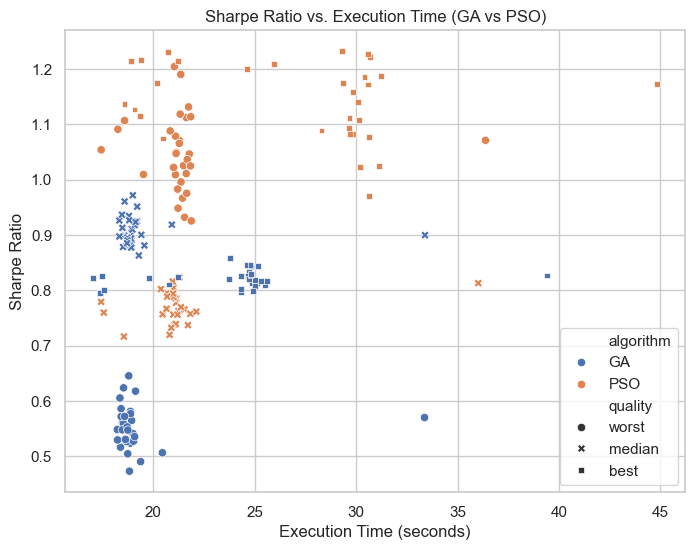

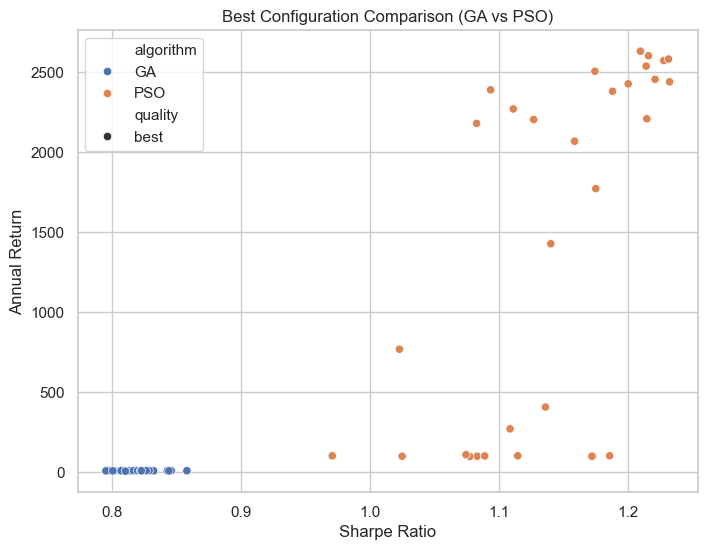

✅ All statistical tests and visualizations completed.


In [2]:
# Define correlation levels and their corresponding file paths
correlation_levels = {
    "none": os.path.join(ROOT_PATH, "experiments", "results", "none_correlation", "final_fine_tuning_results.csv"),
    "low": os.path.join(ROOT_PATH, "experiments", "results", "low_correlation", "final_fine_tuning_results.csv"),
    "medium": os.path.join(ROOT_PATH, "experiments", "results", "medium_correlation", "final_fine_tuning_results.csv"),
    "high": os.path.join(ROOT_PATH, "experiments", "results", "high_correlation", "final_fine_tuning_results.csv"),
}

# Set the alpha value for statistical tests
alpha = 0.05

def perform_statistical_tests(ga_data, pso_data, metric, description):
    print(f"\n{description} - Statistical Tests")
    ga_data = ga_data[metric].dropna()
    pso_data = pso_data[metric].dropna()
    if ga_data.empty or pso_data.empty:
        print("⚠️ One of the data sets is empty after removing NaN values. Skipping test.")
        return
    print(f"GA Mean: {ga_data.mean():.4f}, PSO Mean: {pso_data.mean():.4f}")
    try:
        stat, p_value = wilcoxon(ga_data, pso_data)
        print(f"Wilcoxon Test: Statistic={stat:.4f}, P-Value={p_value:.4f}")
        if p_value < alpha:
            print("Difference is statistically significant.")
        else:
            print("Difference is NOT statistically significant.")
    except ValueError as e:
        print(f"Error in Wilcoxon Test: {e}")
    try:
        stat, p_value = ttest_rel(ga_data, pso_data)
        print(f"Paired t-Test: Statistic={stat:.4f}, P-Value={p_value:.4f}")
        if p_value < alpha:
            print("Difference is statistically significant.")
        else:
            print("Difference is NOT statistically significant.")
    except ValueError as e:
        print(f"Error in Paired t-Test: {e}")

# Loop through each correlation level
for corr_level, file_path in correlation_levels.items():
    print(f"\n{'='*20}\nCorrelation Level: {corr_level.upper()}\n{'='*20}")
    data = pd.read_csv(file_path)
    for quality in ["best", "median", "worst"]:
        ga_data = data[(data["algorithm"] == "GA") & (data["quality"] == quality)]
        pso_data = data[(data["algorithm"] == "PSO") & (data["quality"] == quality)]
        perform_statistical_tests(ga_data, pso_data, "sharpe_ratio", f"Sharpe Ratio ({quality})")
        perform_statistical_tests(ga_data, pso_data, "annual_return", f"Annual Return ({quality})")
        perform_statistical_tests(ga_data, pso_data, "runtime", f"Execution Time ({quality})")

# ...existing visualization functions and code...

# Visualization Functions
def bar_plot(data, metric, title, ylabel):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=data, x="quality", y=metric, hue="algorithm", errorbar=None)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

def box_plot(data, metric, title, ylabel):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x="algorithm", y=metric, hue="quality")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

def scatter_plot(data, x_metric, y_metric, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x_metric, y=y_metric, hue="algorithm", style="quality")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Visualization: Sharpe Ratio Comparison (Best, Median, Worst)
bar_plot(data, "mean_sharpe", "Mean Sharpe Ratios (GA vs PSO)", "Mean Sharpe Ratio")

# Visualization: Return Distribution (Best, Median, Worst)
box_plot(data, "annual_return", "Annual Return Distributions (GA vs PSO)", "Annual Return")

# Visualization: Execution Time Comparison (Best, Median, Worst)
bar_plot(data, "runtime", "Execution Time (GA vs PSO)", "Runtime (seconds)")

# Visualization: Tradeoff Analysis (Sharpe Ratio vs. Time)
scatter_plot(data, "runtime", "sharpe_ratio", "Sharpe Ratio vs. Execution Time (GA vs PSO)", "Execution Time (seconds)", "Sharpe Ratio")

# Best Configuration Comparison (Sharpe Ratio vs Annual Return)
best_data = data[data["quality"] == "best"]
scatter_plot(best_data, "sharpe_ratio", "annual_return", "Best Configuration Comparison (GA vs PSO)", "Sharpe Ratio", "Annual Return")

print("✅ All statistical tests and visualizations completed.")

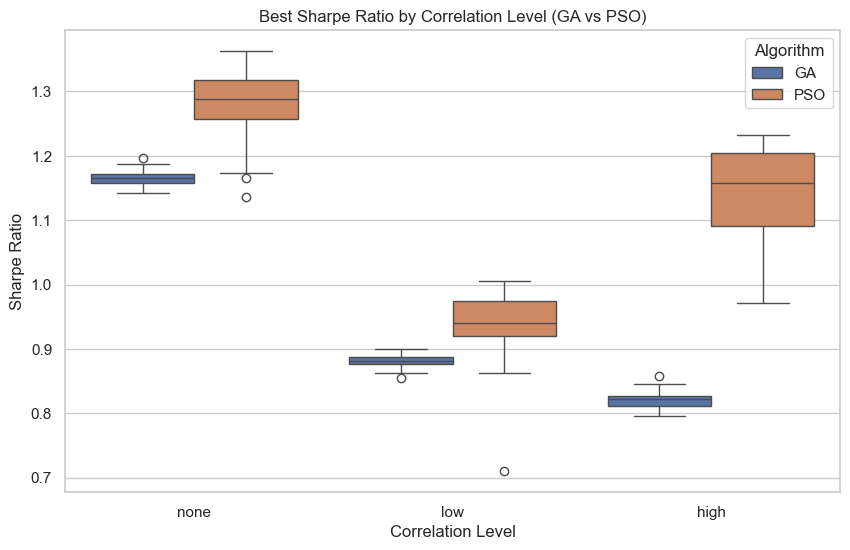

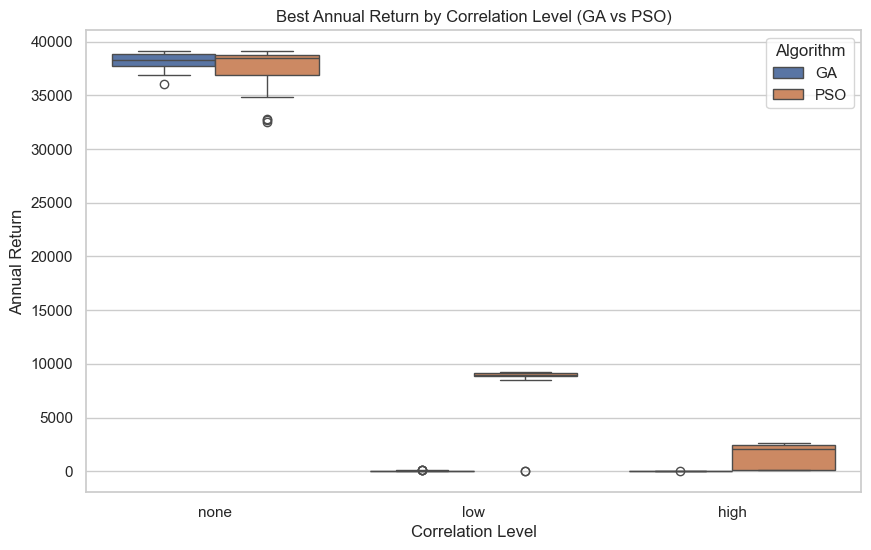

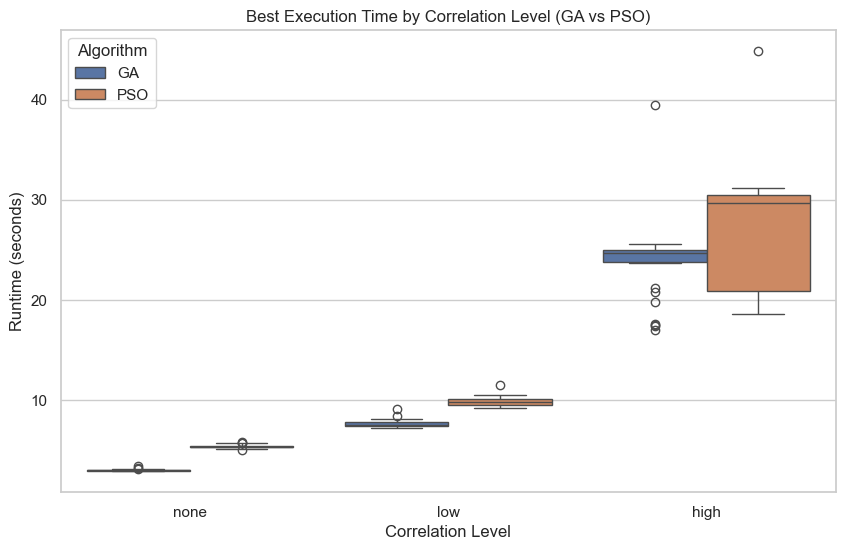

In [3]:
# --- Compare Best Configurations Across Correlation Levels ---

# Collect best configurations for GA and PSO from each correlation level
best_configs = []

for corr_level, file_path in correlation_levels.items():
    data = pd.read_csv(file_path)
    best_ga = data[(data["algorithm"] == "GA") & (data["quality"] == "best")].copy()
    best_ga["correlation"] = corr_level
    best_pso = data[(data["algorithm"] == "PSO") & (data["quality"] == "best")].copy()
    best_pso["correlation"] = corr_level
    best_configs.append(best_ga)
    best_configs.append(best_pso)

# Concatenate all best configurations
best_configs_df = pd.concat(best_configs, ignore_index=True)

# Visualization: Compare best configurations across correlation levels
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=best_configs_df,
    x="correlation",
    y="sharpe_ratio",
    hue="algorithm"
)
plt.title("Best Sharpe Ratio by Correlation Level (GA vs PSO)")
plt.ylabel("Sharpe Ratio")
plt.xlabel("Correlation Level")
plt.legend(title="Algorithm")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=best_configs_df,
    x="correlation",
    y="annual_return",
    hue="algorithm"
)
plt.title("Best Annual Return by Correlation Level (GA vs PSO)")
plt.ylabel("Annual Return")
plt.xlabel("Correlation Level")
plt.legend(title="Algorithm")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=best_configs_df,
    x="correlation",
    y="runtime",
    hue="algorithm"
)
plt.title("Best Execution Time by Correlation Level (GA vs PSO)")
plt.ylabel("Runtime (seconds)")
plt.xlabel("Correlation Level")
plt.legend(title="Algorithm")
plt.show()